Using the code from https://github.com/amueller/introduction_to_ml_with_python to get acquinted with ML using sklearn.

In [65]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris_dataset = load_iris()

#added stratification and a different split size
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.25, stratify=iris_dataset['target']) 

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataset.feature_names

#scatterplots filling up the page, so suppressed
#pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
#                          marker='o', hist_kwds={'bins': 20}, s=60,
#                        alpha=.8, cmap=mglearn.cm3)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Test set predictions:
 [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 1 0 0 1 2 1 0 1 2 2 0 1 2
 2]
Predicted   0   1   2
Observed             
0          13   0   0
1           0  13   0
2           0   1  11
Test set score: 0.97


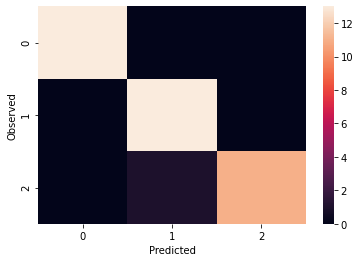

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)


#own addition to plot the confusion matrix for the test set. probably there is a function for this.
test_pred_df = pd.DataFrame(y_test, columns = ['Observed'])
test_pred_df['Predicted'] = y_pred
counts = pd.crosstab(test_pred_df['Observed'], test_pred_df['Predicted'])
print(counts)
ax = sns.heatmap(counts)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

status_text  Benign  Malignant
status                        
0               212          0
1                 0        357
30


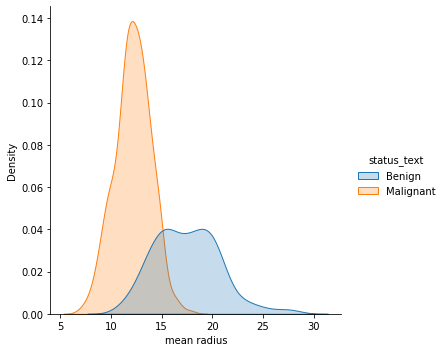

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer_pd = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_pd['status'] = cancer['target']
cancer_pd['status_text'] = np.where(cancer_pd['status'] == 0, "Benign", "Malignant")

counts = pd.crosstab(cancer_pd['status'], cancer_pd['status_text'])
print(counts)


cancer_pd.head()
print(len(cancer['feature_names']))


#pd.plotting.scatter_matrix(cancer_pd.iloc[:, 0:4])
#sns.clustermap(cancer_pd.iloc[:, 0:4], figsize=(7, 5))
sns.displot(cancer_pd, x = "mean radius", hue = "status_text", kind='kde', fill=True)

<AxesSubplot:xlabel='n_neighbors', ylabel='accuracy'>

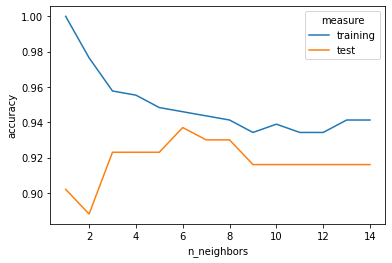

In [91]:
#example from the book, but using seaborn and pandas to plot the results
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# try n_neighbors from 1 to 15
neighbors_settings = range(1, 15)
accuracy = pd.DataFrame(neighbors_settings, columns = ['n_neighbors'])
training_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
accuracy['training'] = training_accuracy
accuracy['test'] = test_accuracy
accuracy_long = accuracy.melt(id_vars=['n_neighbors'], value_vars=['training', 'test'], var_name = 'measure', value_name = 'accuracy')
accuracy_long.head()
sns.lineplot(data = accuracy_long, x = "n_neighbors", y = "accuracy", hue = "measure")


In [95]:
# using linear regression breast cancer data set - not really appropriate

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#ridge regression has less overfitting than lr
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

#lr seems to overfit for the breast cancer data set
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#lasso regression does not fit the data well
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))


Training set score: 0.75
Test set score: 0.70
Training set score: 0.79
Test set score: 0.67
Training set score: 0.56
Test set score: 0.50


/home/frouke/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/frouke/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training set score: 0.960
Test set score: 0.937
Training set score: 0.885
Test set score: 0.881
Accuracy on training set: 1.000
Accuracy on test set: 0.895
Accuracy on training set: 0.991
Accuracy on test set: 0.923
Accuracy on training set: 0.991
Accuracy on test set: 0.923


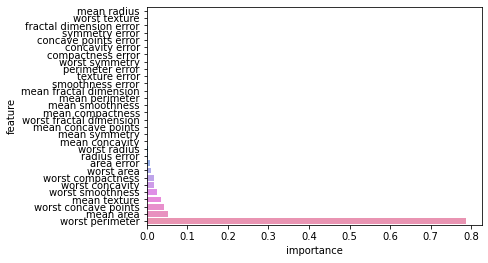

In [131]:
# try a bunch of other classfiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#plt.plot(logreg.coef_.T, 'o')

linear_svm = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm.score(X_test, y_test)))

dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dec_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dec_tree.score(X_test, y_test)))

#plot_tree(dec_tree)  
importance = pd.DataFrame({'feature': cancer['feature_names'], 'importance': dec_tree.feature_importances_}).sort_values('importance')
importance.head()

sns.barplot(data = importance, y = 'feature', x = 'importance',  orient = 'h')


forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
